# Creating and Testing A Machine Learning Model on UK Audi Car Sales

## The Data

The data set, 100,000 UK Used Car Data Set, is obtained from Kaggle at https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes. Various tables comprise the set. I've specifically used the Audi car sales for this project due to (1) keeping the amount of data sufficiently small yet effective and (2) a curiousity to see how Audis in particular are priced in the UK. The Audi data set is composed of about 10,000 records and 9 features. The features are model, year, price, transmission, mileage, fuel type, tax, mpg, and engine size.

## Purpose

This project will seek to explore the data, and then test and tune several machine learning models to gather predictive ability on car price. 

### Exploratory Analysis

##### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### audi data

In [2]:
audi = pd.read_csv('audi.csv')

In [3]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


##### statistics

In [4]:
audi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,10668.0,2017.100675,2.167494,1997.0,2016.00,2017.0,2019.0,2020.0
price,10668.0,22896.685039,11714.841888,1490.0,15130.75,20200.0,27990.0,145000.0
mileage,10668.0,24827.244001,23505.257205,1.0,5968.75,19000.0,36464.5,323000.0
tax,10668.0,126.011436,67.170294,0.0,125.00,145.0,145.0,580.0
mpg,10668.0,50.770022,12.949782,18.9,40.90,49.6,58.9,188.3
engineSize,10668.0,1.930709,0.602957,0.0,1.50,2.0,2.0,6.3


##### info

In [5]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
model           10668 non-null object
year            10668 non-null int64
price           10668 non-null int64
transmission    10668 non-null object
mileage         10668 non-null int64
fuelType        10668 non-null object
tax             10668 non-null int64
mpg             10668 non-null float64
engineSize      10668 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


#### get counts of the categories for all categorical columns

##### transmission

In [6]:
audi['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

##### fuel type

In [7]:
audi['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

##### model

In [8]:
audi['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

##### year

In [9]:
audi['year'].value_counts()

2019    3197
2016    1964
2017    1935
2015     999
2018     864
2020     716
2014     447
2013     291
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1997       1
1998       1
Name: year, dtype: int64

###### engine size

In [10]:
audi['engineSize'].value_counts()

2.0    5169
1.4    1594
3.0    1149
1.6     913
1.5     744
1.0     558
4.0     154
1.8     126
2.5      61
0.0      57
2.9      49
1.2      31
4.2      25
5.2      23
3.2       5
1.9       4
2.7       3
4.1       2
6.3       1
Name: engineSize, dtype: int64

#### distribution of prices (in Euros)

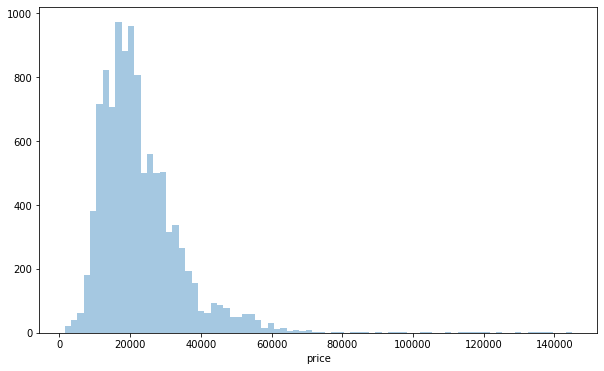

In [11]:
plt.figure(figsize = (10,6))
sns.distplot(audi['price'], kde = False, bins = 80)

The majority of car prices center around the 20,000 mark. There is a large right-tail extending to roughly 140,000. As expected considering sports models comprise some of the sales. These outliers may interfere with regression prediction. I may choose to separate data to exclude them in order to better predict prices for the majority of cars. This will be determined during model tuning

##### visualize years

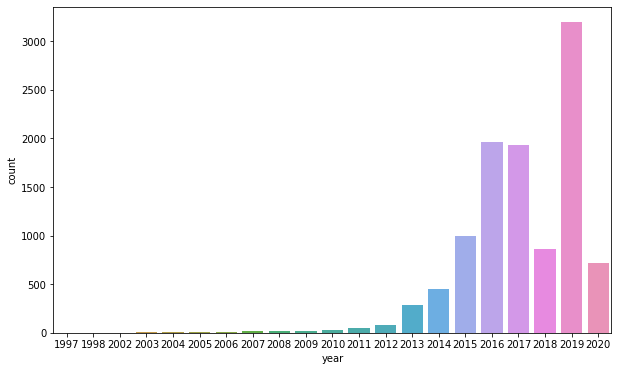

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(audi['year'])

Lots of cars registered in 2019, followed by 2016 and 2017. Left-tail distribution going back to 1997. Another issue? We'll see.

##### Mileage Chart

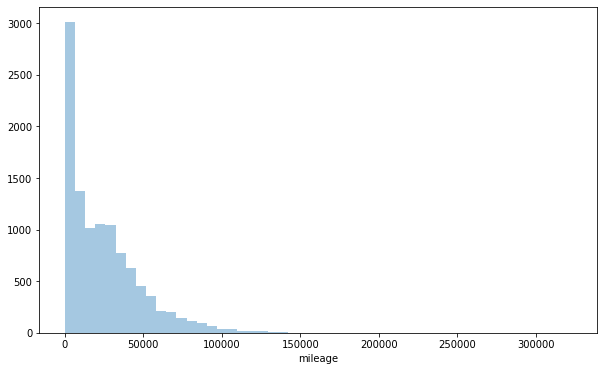

In [13]:
plt.figure(figsize = (10,6))
sns.distplot(audi['mileage'], kde = False)

Extremely right-tailed distribution. The majority of cars being sold are under 50,000 miles

##### MPG Distribution

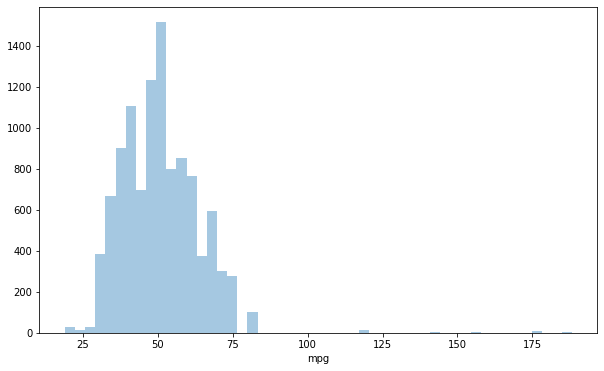

In [14]:
plt.figure(figsize = (10,6))
sns.distplot(audi['mpg'], kde = False)

A fairly symmetric distribution around 50 MPG though with several outliers reaching past 175. Are those high values errors in data entry? Or are there audi's that have this feature? Need to reference Audi's website.

##### Box plot view of the mpg data

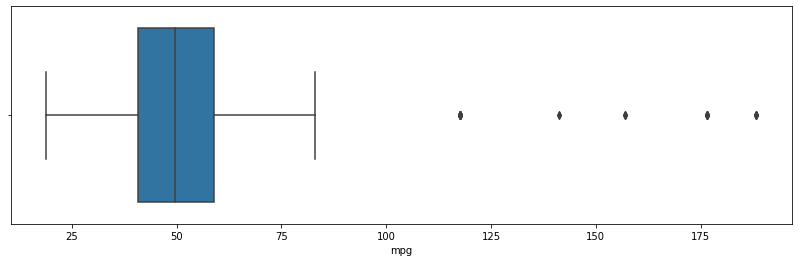

In [15]:
plt.figure(figsize = (14,4))
sns.boxplot(audi['mpg'])

5 outliers clearly seen here and need to be verified for accuracy.

##### Pairplot to visualize relationships between the features

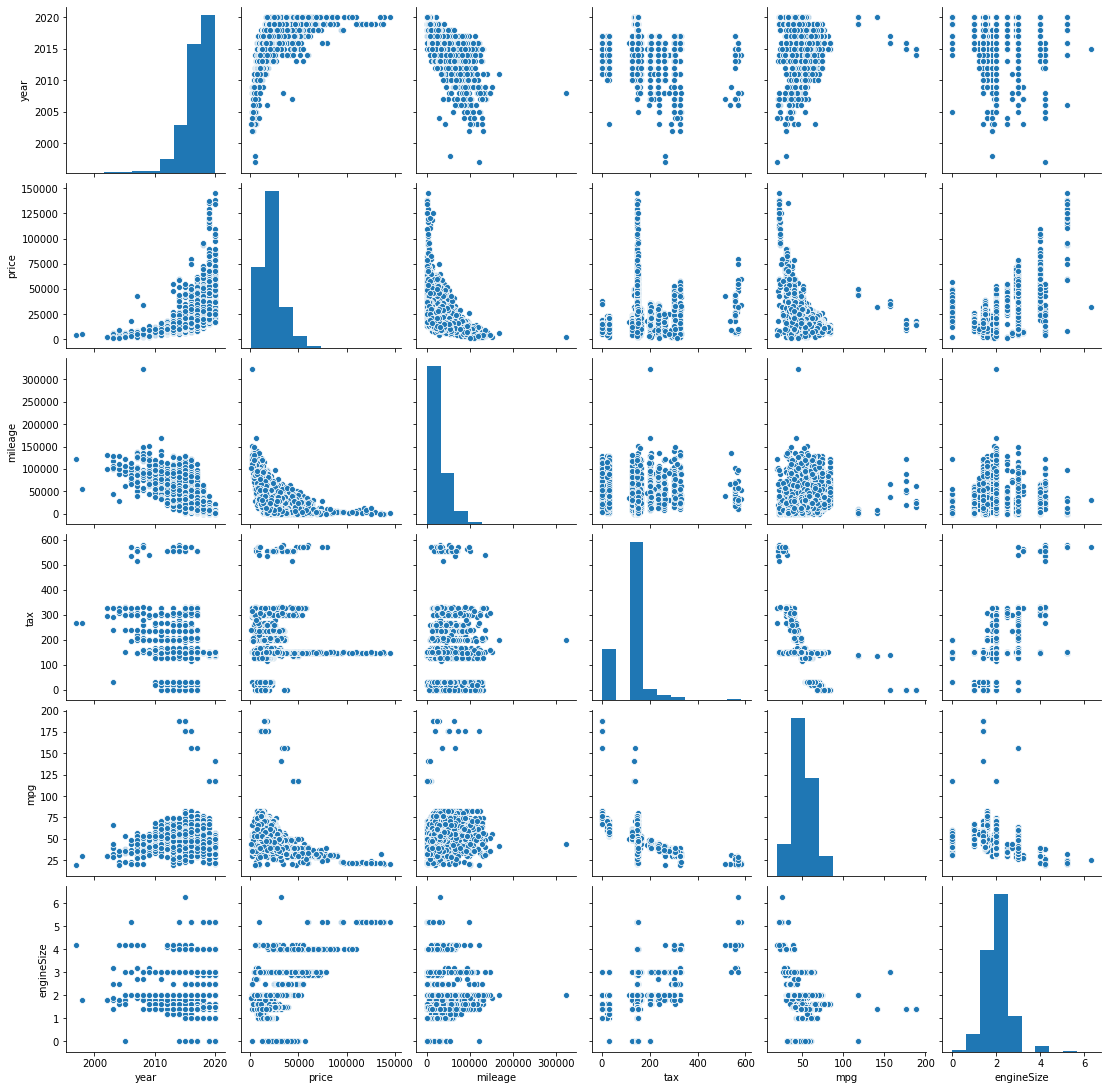

In [16]:
sns.pairplot(audi)

Relationships of note:

year and price: price trends upwards for newer years
mileage and year: mileage trends downwards for newer years
mileage and price: higher mileages associated with lower prices

##### Correlation Matrix

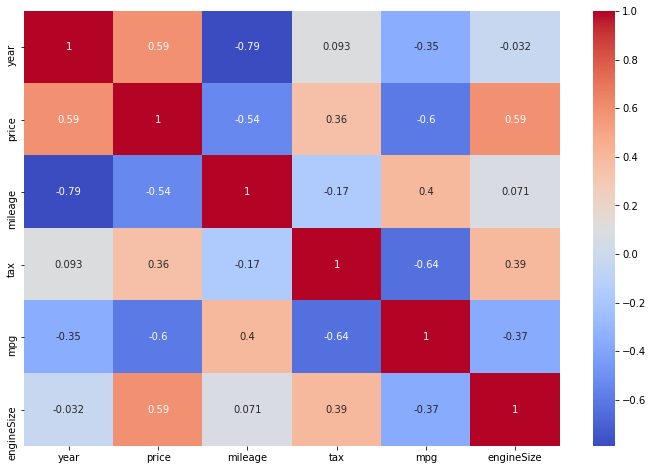

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(audi.corr(), cmap = 'coolwarm', annot=True)

Intuitive correlations are present. Price and year are pretty strongly correlated, while mileage and year are negatively correlated. Also, price and engine size and stronly correlated as well. Nothing is too strongly correlated that may affect a regression model, so there is no concern here.

The correlation matrix is missing model information. This is due to model being a categorical column. There must certainly be some correlation between model and price

##### Model and Average Price

Text(0.5, 1.0, 'Mean Price for Various Audi Models')

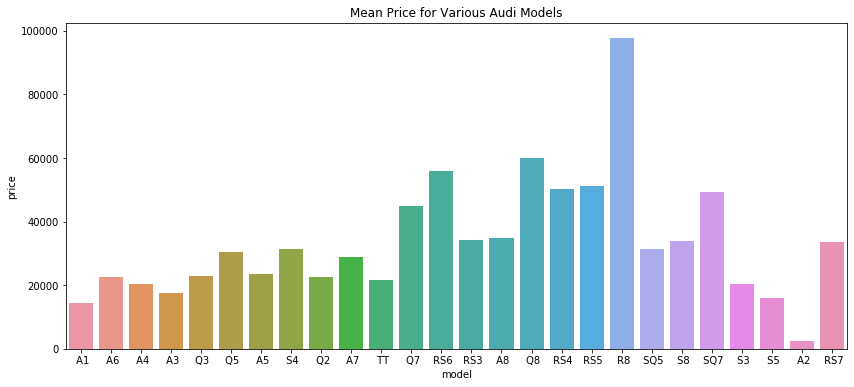

In [18]:
plt.figure(figsize = (14,6))
sns.barplot(audi['model'], audi['price'], ci = None, )
plt.title('Mean Price for Various Audi Models')

The R8 boasts the highest mean price, which is of no surprise considering it's Tony Stark's vehicle of choice :)
The Q8 is 2nd highest, followed by Q7

In [96]:
audi.groupby('model').mean()['price'].sort_values()

model
A2      2490.000000
A1     14327.750557
S5     15980.000000
A3     17408.522032
A4     20255.450398
S3     20379.444444
TT     21784.452381
Q2     22516.975669
A6     22695.385027
Q3     22999.261821
A5     23577.114512
A7     28865.516393
Q5     30445.688712
S4     31248.083333
SQ5    31415.812500
RS7    33490.000000
S8     33807.750000
RS3    34050.515152
A8     34981.847458
Q7     44788.319899
SQ7    49269.000000
RS4    50151.612903
RS5    51265.206897
RS6    55963.871795
Q8     60115.014493
R8     97652.214286
Name: price, dtype: float64

Showing the actual mean prices by model

Text(0.5, 1.0, 'Mean Price for Various Audi Models and Transmission Type')

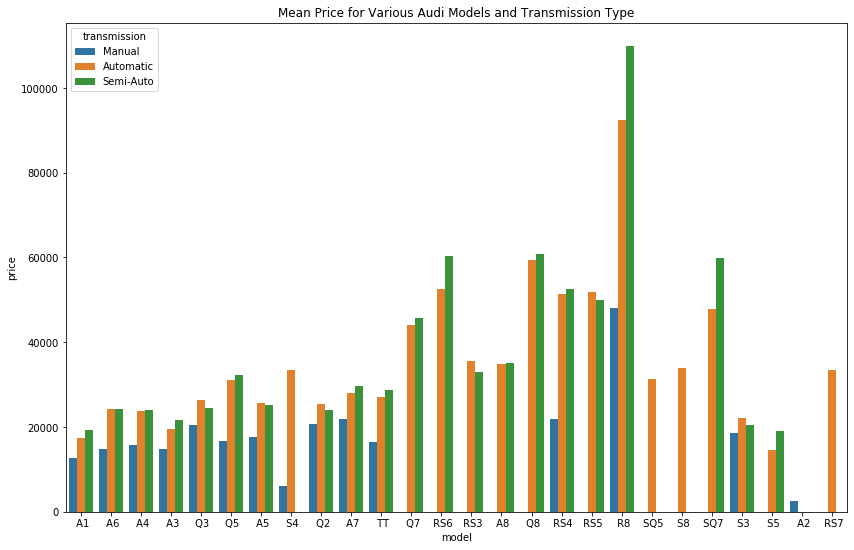

In [19]:
plt.figure(figsize = (14,9))
sns.barplot(audi['model'], audi['price'], ci = None, hue= audi['transmission'])
plt.title('Mean Price for Various Audi Models and Transmission Type')

When splitting by transmission type, 'Semi-Auto' has highest mean price amongst transmission types for many of the models. This is especially true for the R8 model.

##### Now Splitting by Fuel Type

Text(0.5, 1.0, 'Mean Price for Various Audi Models and Transmission Type')

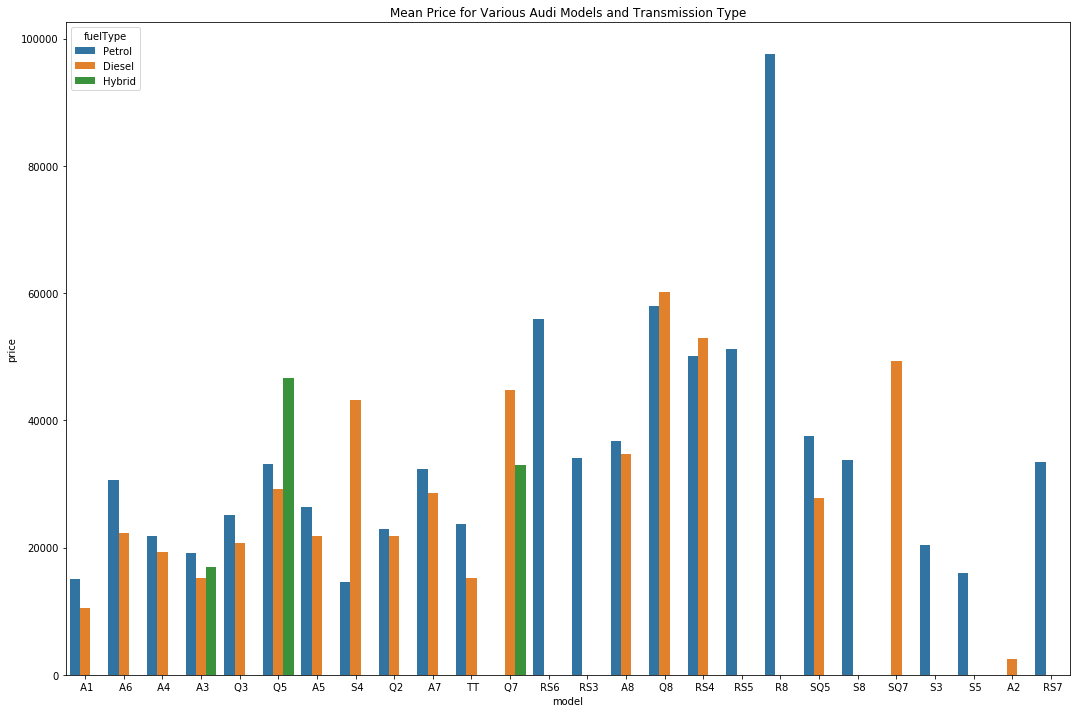

In [20]:
plt.figure(figsize = (18,12))
sns.barplot(audi['model'], audi['price'], ci = None, hue= audi['fuelType'])
plt.title('Mean Price for Various Audi Models and Transmission Type')

For where petrol and diesel are both options, petrol fuel type has a higher mean price than diesel fuel type for most cases

##### Model and Total Sales

Text(0.5, 1.0, 'Sum of Sales for Various Audi Models')

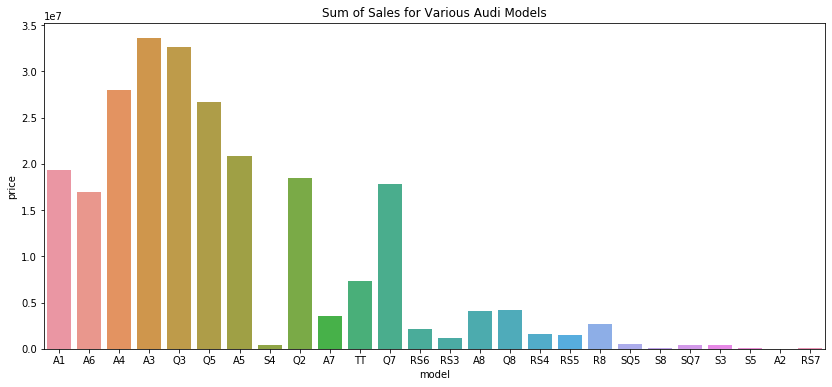

In [100]:
plt.figure(figsize = (14,6))
sns.barplot(audi['model'], audi['price'], ci = None, estimator = sum, capsize = 2)
plt.title('Sum of Sales for Various Audi Models')

A slightly different perspective shows us total sales across the different models. The A3 had highest sales total followed by Q3 and A4 respectively. The R8 sales total seems insignificant now.

##### Zooming in on MPG and Price Relationship

Text(0, 0.5, 'Price (in Euros)')

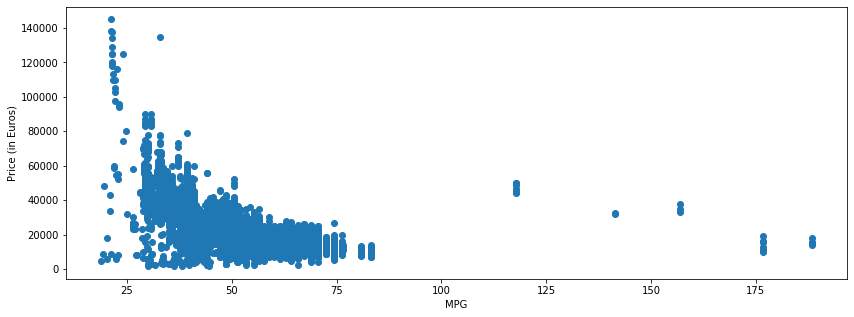

In [22]:
plt.figure(figsize = (14,5))
plt.scatter(audi['mpg'], audi['price'])
plt.xlabel('MPG')
plt.ylabel('Price (in Euros)')

Things to note:

* There is a large cluster in the bottom left corner. As MPG increases, the price filters down to lower values. In the top right corner, there is a vertical column of values with high price values and low MPG. These most likely represent sales of the sports model Audis. On the right hand side, prices for cars with > 100 MPG are all below 80,000. 

##### cars with very high mpg

In [23]:
audi[audi['mpg'] > 140]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
864,A3,2020,31990,Semi-Auto,2165,Hybrid,135,141.3,1.4
2550,Q7,2017,32998,Semi-Auto,66477,Hybrid,140,156.9,3.0
3106,A3,2015,14981,Semi-Auto,28294,Hybrid,0,188.3,1.4
4261,A3,2015,17990,Automatic,14000,Hybrid,0,188.3,1.4
4493,A3,2014,15490,Automatic,24597,Hybrid,0,188.3,1.4
4559,A3,2015,16000,Semi-Auto,48954,Hybrid,0,176.6,1.4
4879,A3,2014,15000,Semi-Auto,24597,Hybrid,0,188.3,1.4
5666,Q7,2016,37999,Automatic,36461,Diesel,0,156.9,3.0
5717,A3,2016,18900,Semi-Auto,18486,Hybrid,0,176.6,1.4
5981,Q7,2016,34999,Semi-Auto,36461,Diesel,0,156.9,3.0


In Googling MPG values for Audi cars, the highest stated MPG for an A3 Hybrid is 283 MPG. Therefore, I will retain these high MPG values. 

##### engine size

earlier, I noticed the minimum engine size value being 0. This is very odd as an engine should not be size zero, unless the engine is missing from the car. An unlikely scenario! Let's look at the records that have an engine of size 0

In [24]:
audi[audi['engineSize'] == 0].sort_values(by='price', ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7728,SQ5,2020,56450,Automatic,1500,Diesel,145,34.5,0.0
7521,Q5,2020,49790,Automatic,1500,Petrol,135,117.7,0.0
7644,SQ5,2019,48800,Automatic,1500,Diesel,145,34.5,0.0
7718,S4,2019,45000,Automatic,4900,Diesel,145,40.4,0.0
7641,S4,2020,44888,Automatic,1500,Diesel,145,39.2,0.0
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7700,Q5,2019,44450,Automatic,5225,Petrol,135,117.7,0.0
7740,Q3,2020,41888,Automatic,1500,Petrol,145,31.0,0.0
7688,S4,2019,39850,Automatic,4129,Diesel,145,40.4,0.0
7739,Q3,2020,38888,Automatic,1500,Petrol,145,30.7,0.0


All of these records have non-zero MPG. It is impossible to have a zero size engine and still have associated MPG. Likely, the zeroes are place holders for unknown engine sizes. This problem should be addressed via imputation. 

For imputation, I want to replace 0 with the mean engine size given some features, starting with model of car

In [25]:
audi[audi['model'] == 'A7']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


Hmm... no values appear. 

In [26]:
audi[audi['model'] == 'A3']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


No values again. Weird.

In [27]:
type(audi['model'][1])

str

The datatype of the model values is string. Therefore, retrieving values as strings should work. What is the issue?

After tinkering around, I had an idea. Perhaps there is an extra character in the entry such as a space. 

In [28]:
audi[audi['model'] == ' A7']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
116,A7,2014,19500,Automatic,55774,Diesel,235,44.8,3.0
203,A7,2019,39985,Automatic,5201,Diesel,145,38.7,3.0
234,A7,2019,43885,Semi-Auto,10,Diesel,145,38.2,3.0
350,A7,2019,32985,Automatic,1285,Diesel,145,39.2,3.0
476,A7,2019,41995,Semi-Auto,933,Diesel,145,45.6,2.0
...,...,...,...,...,...,...,...,...,...
10341,A7,2020,45000,Automatic,1200,Diesel,150,38.2,3.0
10414,A7,2019,48790,Automatic,4700,Diesel,145,35.8,3.0
10441,A7,2016,22990,Semi-Auto,26000,Diesel,160,52.3,3.0
10585,A7,2016,43000,Automatic,55500,Petrol,325,29.7,4.0


It worked! There is an additional space in front of the value. 

In [29]:
audi[audi['model'] == ' A3']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
10,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4
13,A3,2017,16400,Manual,21695,Petrol,30,58.9,1.4
15,A3,2017,14500,Automatic,26156,Petrol,145,58.9,1.4
...,...,...,...,...,...,...,...,...,...
10658,A3,2016,14995,Manual,39750,Petrol,30,57.6,1.4
10662,A3,2013,12695,Manual,31500,Petrol,125,53.3,1.4
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0


Trying the extra space with another car model, just to be sure

I don't like the presence of that additional space. I want to remove it for convenience

In [30]:
# for each value in the model column, I'm removing the space in front of the model name
audi['model'] = audi['model'].apply(lambda value: value.replace(' ',''), )

In [31]:
audi[audi['model'] == 'A7']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
116,A7,2014,19500,Automatic,55774,Diesel,235,44.8,3.0
203,A7,2019,39985,Automatic,5201,Diesel,145,38.7,3.0
234,A7,2019,43885,Semi-Auto,10,Diesel,145,38.2,3.0
350,A7,2019,32985,Automatic,1285,Diesel,145,39.2,3.0
476,A7,2019,41995,Semi-Auto,933,Diesel,145,45.6,2.0
...,...,...,...,...,...,...,...,...,...
10341,A7,2020,45000,Automatic,1200,Diesel,150,38.2,3.0
10414,A7,2019,48790,Automatic,4700,Diesel,145,35.8,3.0
10441,A7,2016,22990,Semi-Auto,26000,Diesel,160,52.3,3.0
10585,A7,2016,43000,Automatic,55500,Petrol,325,29.7,4.0


It works!

##### mean engine size by model

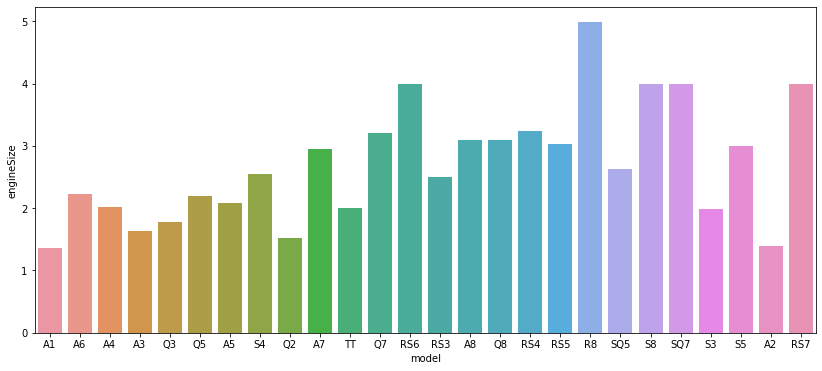

In [32]:
plt.figure(figsize = (14,6))
sns.barplot(audi['model'], audi['engineSize'], ci = None)

##### most common engine size by model

In [108]:
from scipy import stats

In [116]:
# create a dictionary storing model and most common engine size of the model
mode_engines = dict(audi.groupby('model').agg(lambda x: stats.mode(x['engineSize'])[0])['engineSize'].sort_values())

In [117]:
mode_engines

{'A1': 1.4,
 'A2': 1.4,
 'Q2': 1.6,
 'S3': 2.0,
 'Q5': 2.0,
 'Q3': 2.0,
 'TT': 2.0,
 'A6': 2.0,
 'A5': 2.0,
 'A4': 2.0,
 'A3': 2.0,
 'RS3': 2.5,
 'RS5': 2.9,
 'RS4': 2.9,
 'SQ5': 3.0,
 'S5': 3.0,
 'S4': 3.0,
 'A8': 3.0,
 'A7': 3.0,
 'Q7': 3.0,
 'Q8': 3.0,
 'RS7': 4.0,
 'SQ7': 4.0,
 'S8': 4.0,
 'RS6': 4.0,
 'R8': 5.2}

In [123]:
audi['engineSize'].replace(0, np.nan, inplace = True )

0's are replaced with nan values for later conversion

In [125]:
audi['engineSize'][7728]

nan

checking that the engine size for car 7728 (one of the cars with a size 0 engine) is now nan

In [127]:
audi['engineSize'] = audi.groupby(['model'], sort=False)['engineSize'].apply(lambda x: x.fillna(x.mode().iloc[0]))

Our conversion. Where engine size is nan (originally 0), it is replaced with the mode of the associated model of the car. So, for car 7728, an SQ5, the mode will be 3.0 per our mode_engines dictionary created a few cells above

In [128]:
audi['engineSize'][7728]

3.0

The engine size for car 7728 is in fact now 3.0

## Initial Model Tests

In [129]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [130]:
audi_ml = pd.get_dummies(audi, drop_first=True, columns = ['transmission', 'fuelType', 'model'])

In [131]:
audi_ml.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,...,model_RS5,model_RS6,model_RS7,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT
0,2017,12500,15735,150,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [132]:
lreg = LinearRegression()

In [42]:
from sklearn.model_selection import train_test_split

In [133]:
X = audi_ml.drop(['price'], axis = 1)
y = audi_ml['price']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Apply Linear Regression to Raw Data

In [135]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
lreg.score(X_test, y_test)

0.8956811700965293

r2 score of 89.6% is not bad for a first attempt!

In [137]:
predictions = lreg.predict(X_test)

##### scatter plot of model performance

Text(0, 0.5, 'Actual')

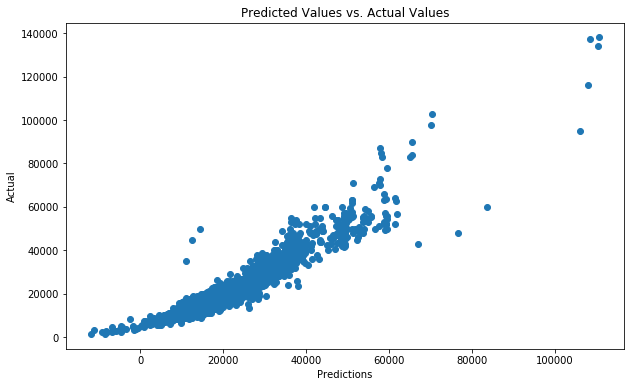

In [156]:
plt.figure(figsize = (10,6))
plt.scatter(predictions, y_test)
plt.title('Predicted Values vs. Actual Values')
plt.xlabel('Predictions')
plt.ylabel('Actual')

##### residual plot

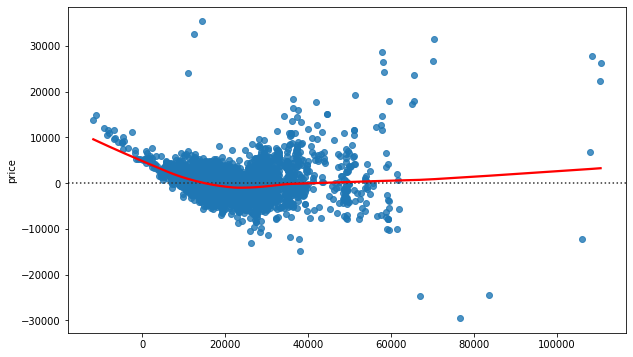

In [149]:
plt.figure(figsize = (10,6))
sns.residplot(predictions, y_test, lowess = True, line_kws = {'color': 'r'})

With the slight curvature on the left, this indicates a possible non-linear relationship. This can be addressed with adding polynomial terms

In [157]:
audi_ml['year_sq'] = audi_ml['year'].apply(lambda x: x**2)
audi_ml.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,...,model_RS6,model_RS7,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT,year_sq
0,2017,12500,15735,150,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,4068289
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4064256
2,2016,11000,29946,30,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,4064256
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4068289
4,2019,17300,1998,145,49.6,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,4076361


In [158]:
X = audi_ml.drop(['price'], axis = 1)
y = audi_ml['price']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
lreg.score(X_test, y_test)

0.9052432794354802

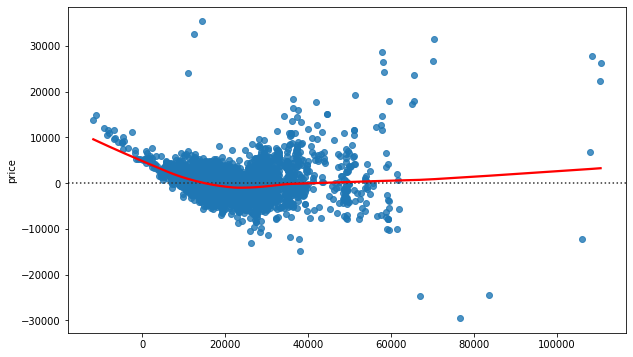

In [162]:
plt.figure(figsize = (10,6))
sns.residplot(predictions, y_test, lowess = True, line_kws = {'color': 'r'})

The relationship hasn't changed much, if at all. But the R2 score has increased slightly, meaning unexplained variance has lessened. In the Model Tuning section, I may try experimenting with other transformations for various predictors

##### residual histogram

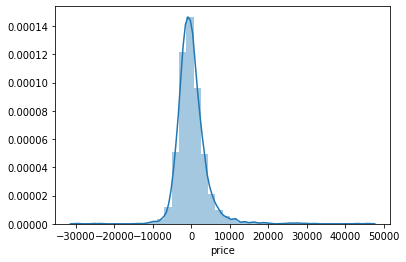

In [49]:
sns.distplot(y_test - predictions, bins = 40)

In [163]:
predictions = lreg.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [164]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  2467.7255894495
MSE:  13194290.996669441
RMSE 3632.394664222136


In [165]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
mean_price = audi['price'].mean()

RMSE / mean_price

0.15864281916689493

With the root mean squared error, our percentage of error compared to the mean price is about 16%

In [166]:
coeff_df = pd.DataFrame(lreg.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by = 'Coefficient', ascending = False)

,Coefficient
model_R8,56793.255659
model_RS6,25065.080662
fuelType_Hybrid,24684.609524
model_Q8,23742.778459
model_RS4,20081.807570
model_RS5,18812.752264
model_RS7,18072.701601
model_SQ7,14555.118324
model_Q7,13910.678921
model_RS3,10536.779441


Coefficients to show the effect of categories on price. There is a large issue with the year predictor (on bottom) having -422793 as a value. This may have been caused when employing the year_sq predictor. If we look at year_sq, 5th from bottom, we see a more reasonable value of 105, suggesting that a unit increase is associated with an additional $105 on price. However, sklearn does not provide p-values to ascertain the validity of the coefficients. Each may or may not be statistically significant.

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfr = RandomForestRegressor()

In [168]:
audi_ml.drop(['year_sq'], axis=1, inplace = True)

We will not use the polynomial term initially

In [56]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
rfr.score(X_test, y_test)

0.9607392716282654

The random forest regressor has a higher r2 score than with the linear regression. 96 vs 90.5. Almost a 6% difference

In [58]:
forest_pred = rfr.predict(X_test)

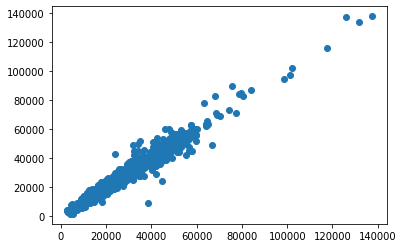

In [59]:
plt.scatter(forest_pred, y_test)

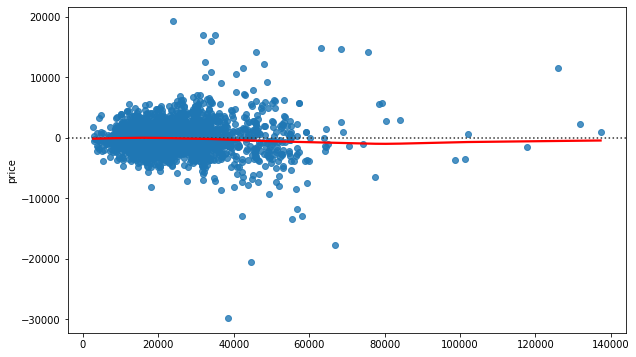

In [167]:
plt.figure(figsize = (10,6))
sns.residplot(forest_pred, y_test, lowess = True, line_kws = {'color': 'r'})

The random forest algorithm has done a much better job with explainability in variance. There is no clear pattern in the residuals.

In [60]:
print('MAE: ', mean_absolute_error(y_test, forest_pred))
print('MSE: ', mean_squared_error(y_test, forest_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, forest_pred)))

MAE:  1521.22573916374
MSE:  5466815.142944333
RMSE 2338.1221402964247


In [61]:
forest_RMSE = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_RMSE / mean_price

0.10211618565203227

Here, the error is 10% compared to mean price versus 16% with the linear regression

### SVM

In [62]:
from sklearn import svm

In [63]:
svm = svm.SVR()

In [64]:
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
svm.score(X_test, y_test)

0.036887786894938435

yikes

In [66]:
from sklearn.preprocessing import normalize

In [67]:
X_train_normal = normalize(X_train)

In [68]:
svm_X_train = pd.DataFrame(X_train_normal, columns = X_train.columns)

In [69]:
svm.fit(svm_X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
svm.score(X_test, y_test)

-0.03736167742683505

Not having much luck with SVM. Lets stick with either Linear Regression or Random Forest

## Model Tuning

##### grid search

In [71]:
from sklearn.model_selection import GridSearchCV

Let's set up a grid search to find the best parameters for our random forest regressor

In [169]:
rfr = RandomForestRegressor()

In [170]:
# dictionary of parameter values to pass to grid search for evaluation

param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 'None']
}

In [171]:
grid = GridSearchCV(rfr, param_grid, verbose = 3)

In [172]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.956, total=   1.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.952, total=   1.3s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.955, total=   1.3s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.951, total=   1.3s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.953, total=   1.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.956, total=   2.6s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.952, total=   2.7s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.955, total=   2.7s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.953, 

[CV]  max_depth=10, max_features=log2, n_estimators=700, score=0.935, total=   2.8s
[CV] max_depth=10, max_features=log2, n_estimators=700 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=700, score=0.934, total=   2.8s
[CV] max_depth=10, max_features=log2, n_estimators=700 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=700, score=0.941, total=   3.1s
[CV] max_depth=10, max_features=log2, n_estimators=700 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=700, score=0.941, total=   2.9s
[CV] max_depth=10, max_features=log2, n_estimators=700 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=700, score=0.946, total=   3.2s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, score=0.957, total=   2.5s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, score=0.959, 

[CV]  max_depth=20, max_features=log2, n_estimators=200, score=0.959, total=   1.9s
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=200, score=0.961, total=   1.9s
[CV] max_depth=20, max_features=log2, n_estimators=500 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=500, score=0.952, total=   4.7s
[CV] max_depth=20, max_features=log2, n_estimators=500 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=500, score=0.956, total=   4.7s
[CV] max_depth=20, max_features=log2, n_estimators=500 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=500, score=0.962, total=   4.6s
[CV] max_depth=20, max_features=log2, n_estimators=500 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=500, score=0.959, total=   4.6s
[CV] max_depth=20, max_features=log2, n_estimators=500 ...............
[CV]  max_depth=20, max_features=log2, n_estimators=500, score=0.961, 

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: Fi

[CV]  max_depth=None, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=200 .............
[CV]  max_depth=None, max_features=auto, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=200 .............
[CV]  max_depth=None, max_features=auto, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=500, score=nan, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=500, score=nan, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=500, score=nan, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=auto, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=auto, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=auto, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=auto, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=auto, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: Fi

[CV]  max_depth=None, max_features=auto, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=sqrt, n_estimators=100 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=None, max_features=sqrt, n_estimators=100 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=100 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=None, max_features=sqrt, n_estimators=100 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=100 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=200 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=200 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=200 .............
[CV]  max_depth=None, max_features=sqrt, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=sqrt, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=sqrt, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=sqrt, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=sqrt, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=sqrt, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=500, score=nan, total=   0.2s
[CV] max_depth=None, max_features=sqrt, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=sqrt, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=sqrt, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=sqrt, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=sqrt, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=sqrt, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: Fi

[CV]  max_depth=None, max_features=sqrt, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=log2, n_estimators=100 .............
[CV]  max_depth=None, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=100 .............
[CV]  max_depth=None, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=100 .............
[CV]  max_depth=None, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=None, max_features=log2, n_estimators=100 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=100 .............
[CV]  max_depth=None, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=200 .............
[CV]  max_depth=None, max_features=log2, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=200 .............
[CV]  max_depth=None, max_features=log2, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=200 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=200 .............
[CV]  max_depth=None, max_features=log2, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=None, max_features=log2, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=log2, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=log2, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=log2, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=log2, n_estimators=500 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=500, score=nan, total=   0.3s
[CV] max_depth=None, max_features=log2, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=log2, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=log2, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=log2, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)


[CV]  max_depth=None, max_features=log2, n_estimators=700, score=nan, total=   0.4s
[CV] max_depth=None, max_features=log2, n_estimators=700 .............


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  8.2min finished


[CV]  max_depth=None, max_features=log2, n_estimators=700, score=nan, total=   0.4s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

##### grid search results

In [173]:
grid.best_score_

0.9581389377612002

The best score from the grid search on training data is 95.8

In [174]:
grid.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}

And these are the best parameters

##### updated model

In [175]:
updated_rfr = RandomForestRegressor(bootstrap = True,
 max_depth = 20,
 max_features = 'log2',
 n_estimators = 200)

In [176]:
updated_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [177]:
forest_pred = updated_rfr.predict(X_test)

In [178]:
updated_rfr.score(X_test, y_test)

0.9657485547109871

96.6 is a slight improvement to the earlier 96

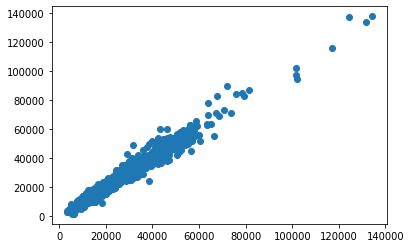

In [179]:
plt.scatter(forest_pred, y_test)

As seen, we are getting great results without having to change the features. 

But, are there any interaction effects?

##### interaction effects

In [180]:
audi_ml.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,...,model_RS5,model_RS6,model_RS7,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT
0,2017,12500,15735,150,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Is there an interaction effect with year and mileage?

In [181]:
audi_ml['year:mileage'] = audi_ml['year'] * audi_ml['mileage']

In [183]:
audi_ml.corr()['price']

year                      0.592581
price                     1.000000
mileage                  -0.535357
tax                       0.356157
mpg                      -0.600334
engineSize                0.621358
transmission_Manual      -0.483137
transmission_Semi-Auto    0.259356
fuelType_Hybrid           0.031946
fuelType_Petrol          -0.033733
model_A2                 -0.016867
model_A3                 -0.220113
model_A4                 -0.086946
model_A5                  0.017438
model_A6                 -0.004719
model_A7                  0.054804
model_A8                  0.109107
model_Q2                 -0.009366
model_Q3                  0.003427
model_Q5                  0.192868
model_Q7                  0.367410
model_Q8                  0.256350
model_R8                  0.327367
model_RS3                 0.053039
model_RS4                 0.125603
model_RS5                 0.126436
model_RS6                 0.170989
model_RS7                 0.008756
model_S3            

year:mileage has a similar negative correlation with price (-.53) as does mileage alone

##### engine size and tax

In [184]:
audi_ml['engineSize:tax'] = audi_ml['engineSize'] * audi_ml['tax']

##### mpg and mileage

In [185]:
audi_ml['mpg:mileage'] = audi_ml['mpg'] * audi_ml['mileage']

In [186]:
audi_ml.corr()['price']

year                      0.592581
price                     1.000000
mileage                  -0.535357
tax                       0.356157
mpg                      -0.600334
engineSize                0.621358
transmission_Manual      -0.483137
transmission_Semi-Auto    0.259356
fuelType_Hybrid           0.031946
fuelType_Petrol          -0.033733
model_A2                 -0.016867
model_A3                 -0.220113
model_A4                 -0.086946
model_A5                  0.017438
model_A6                 -0.004719
model_A7                  0.054804
model_A8                  0.109107
model_Q2                 -0.009366
model_Q3                  0.003427
model_Q5                  0.192868
model_Q7                  0.367410
model_Q8                  0.256350
model_R8                  0.327367
model_RS3                 0.053039
model_RS4                 0.125603
model_RS5                 0.126436
model_RS6                 0.170989
model_RS7                 0.008756
model_S3            

In [187]:
lm = LinearRegression()

In [188]:
lm.fit(audi_ml[['year:mileage', 'engineSize:tax', 'mpg:mileage']], audi_ml['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

A quick regression to see the coefficient values for our interactions

In [189]:
pd.DataFrame(lm.coef_,['year:mileage', 'engineSize:tax', 'mpg:mileage'], columns = ['Coefficients'] )

,Coefficients
year:mileage,-0.000218
engineSize:tax,27.769315
mpg:mileage,0.003093


##### p-values of interaction terms

In [190]:
from scipy.stats import pearsonr

In [191]:
inter_df = audi_ml[['year:mileage', 'engineSize:tax', 'mpg:mileage', 'price']]

In [192]:
inter_df.head()

,year:mileage,engineSize:tax,mpg:mileage,price
0,31737495,210.0,871719.0,12500
1,72985248,40.0,2324232.6,16500
2,60371136,42.0,1659008.4,11000
3,52345184,290.0,1746569.6,16800
4,4033962,145.0,99100.8,17300


In [193]:
pearsonr(audi_ml['mpg:mileage'], audi_ml['price'])

(-0.5581292896477652, 0.0)

In [194]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [195]:
calculate_pvalues(audi_ml[['year:mileage', 'engineSize:tax', 'mpg:mileage', 'price']])

,year:mileage,engineSize:tax,mpg:mileage,price
year:mileage,0,0.003,0,0
engineSize:tax,0.003,0,0,0
mpg:mileage,0,0,0,0
price,0,0,0,0


The p-values of our interaction terms are statistically significant in their correlation to price

##### linear regression with interaction terms included

In [196]:
lm = LinearRegression()

In [197]:
X = audi_ml.drop(['price'], axis = 1)
y = audi_ml['price']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [199]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
lm.score(X_test, y_test)

0.9126574181553936

A slight improvement to the linear regression when interaction terms included

In [201]:
lm.intercept_

-4503646.847967589

In [202]:
preds = lm.predict(X_test)

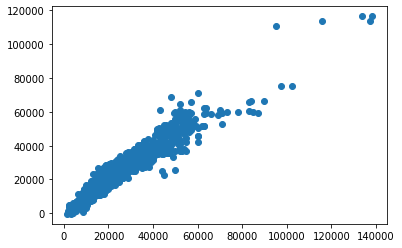

In [203]:
plt.scatter(y_test, preds)

In [204]:
mean_squared_error(y_test, preds)

12161917.74464662

In [205]:
np.sqrt(mean_squared_error(y_test, preds))

3487.394119489023

##### distributions of certain predictors and transformation to normal distribution

Text(0.5, 1.0, 'tax')

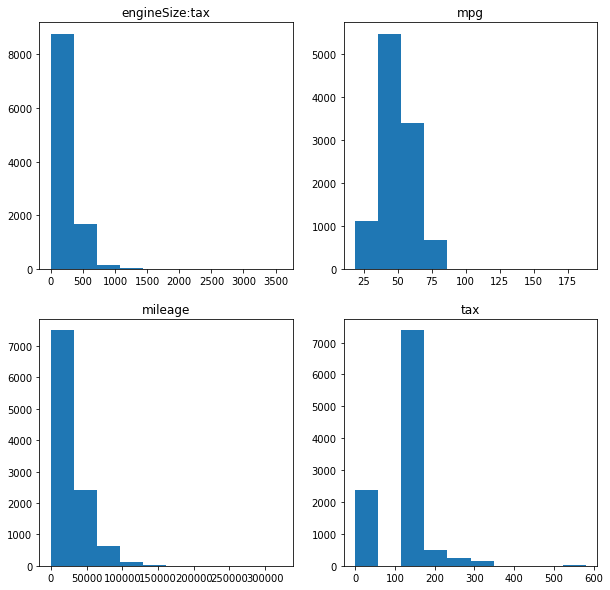

In [206]:

fig,axes = plt.subplots(2,2, figsize = (10,10))

axes[0,0].hist(audi_ml['engineSize:tax'])
axes[0,0].set_title('engineSize:tax')

axes[0,1].hist(audi_ml['mpg'])
axes[0,1].set_title('mpg')

axes[1,0].hist(audi_ml['mileage'])
axes[1,0].set_title('mileage')

axes[1,1].hist(audi_ml['tax'])
axes[1,1].set_title('tax')


In [207]:
audi_ml_norm = audi_ml

In [208]:
audi_ml_norm[['mileage','tax','mpg','engineSize','engineSize:tax','year:mileage','mpg:mileage']] = audi_ml_norm[['mileage','tax','mpg','engineSize',
              'engineSize:tax','year:mileage','mpg:mileage']].apply(lambda x: (x-x.min()) / (x.max() - x.min()))
                                                                                                    

In [209]:
audi_ml_norm

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,...,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT,year:mileage,engineSize:tax,mpg:mileage
0,2017,12500,0.048712,0.258621,0.215466,0.075472,1,0,0,1,...,0,0,0,0,0,0,0,0.048931,0.058480,0.040652
1,2016,16500,0.112081,0.034483,0.267414,0.188679,0,0,0,0,...,0,0,0,0,0,0,0,0.112527,0.011139,0.108391
2,2016,11000,0.092709,0.051724,0.215466,0.075472,1,0,0,1,...,0,0,0,0,0,0,0,0.093079,0.011696,0.077368
3,2017,16800,0.080344,0.250000,0.285714,0.188679,0,0,0,0,...,0,0,0,0,0,0,0,0.080704,0.080757,0.081451
4,2019,17300,0.006183,0.250000,0.181228,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0.006217,0.040379,0.004620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,0.012437,0.250000,0.181228,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0.012511,0.040379,0.009293
10664,2020,16999,0.006121,0.258621,0.181228,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0.006157,0.041771,0.004574
10665,2020,17199,0.001882,0.258621,0.181228,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0.001894,0.041771,0.001407
10666,2017,19499,0.026765,0.258621,0.171192,0.075472,0,0,0,1,...,0,0,0,0,0,0,0,0.026885,0.058480,0.019313


In [210]:
X = audi_ml_norm.drop(['price'], axis = 1)
y = audi_ml_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [211]:

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
lm.score(X_test, y_test)

0.9126574182416385

Normalized data has not offered any improvements to the linear regression

#### Random Forest

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:
updated_rfr = RandomForestRegressor(bootstrap = True,
 max_depth = 20,
 max_features = 'log2',
 n_estimators = 200)

In [215]:
updated_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [216]:
preds = updated_rfr.predict(X_test)

In [217]:
updated_rfr.score(X_test, y_test)

0.9613286824924482

##### see important features

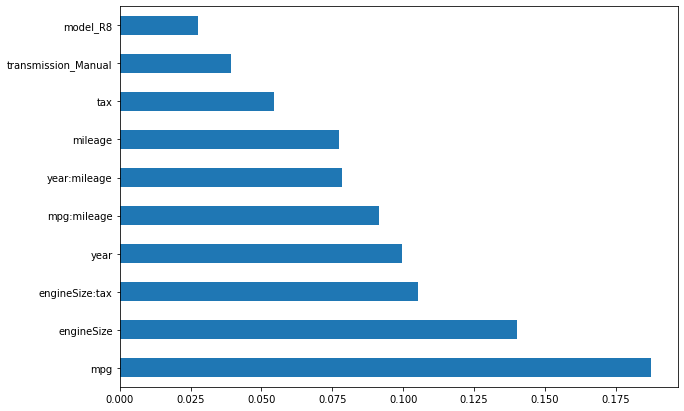

In [218]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(updated_rfr.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

It seems that mpg is the most important feature to the random forest, followed by engineSize. Notice the interaction term engineSize:tax (computed simply by multiplying the two values) is the third most important. Actually, all three of the interaction terms are in the top 10 features!

##### cross validation score

In [219]:
cv_results = cross_val_score(updated_rfr, X_train, y_train, cv = 5)

In [220]:
cv_results.mean()

0.950985063520102

The cross val score gives us a score we are more likely to expect. This score is the average of 5 trials of the model

Lets redesign the random forest to only use the important features, and see if performance is similar.

##### train with only 10 important features

In [221]:
X = audi_ml_norm[['mpg','engineSize','mpg:mileage','engineSize:tax','year','mileage','year:mileage','tax','transmission_Manual','model_R8']]
y = audi_ml_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [222]:
X_train.head(2)

,mpg,engineSize,mpg:mileage,engineSize:tax,year,mileage,year:mileage,tax,transmission_Manual,model_R8
9051,0.305195,0.113208,0.090134,0.008911,2015,0.084753,0.085048,0.034483,1,0
6969,0.197166,0.075472,0.043902,0.058480,2017,0.055725,0.055974,0.258621,1,0


In [224]:
rfr = RandomForestRegressor(bootstrap = True,
 max_depth = 20,
 max_features = 'log2',
 n_estimators = 200)

In [227]:
cv_results = cross_val_score(updated_rfr, X_train, y_train, cv = 5)

In [228]:
cv_results.mean()

0.9355236379490487

performance did drop slightly by 2%. Let's stick with more features

## Conclusion

After testing linear regression and random forest models on the UK Audi car sales data, it is clear that the random forest is the better choice for predicting Audi car prices in the UK. The random forest model results in score of 95% whereas the linear regression results in a score of 91%. Both are good, but the linear regression model will need additional feature transformations in order to improve.

One predictor missing from the data that may of of use is location of sale. Location could be one of, or a whole of, city, street, and postal code. There is a possibility that location affects prices as well, and may account for some of the outliers in the residual plots.

The random forest model may now be implemented in a pipeline to predict prices on UK Audi used cars